<a href="https://colab.research.google.com/github/Kevin2558/Data_Science/blob/main/PCA_RedWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/red-wine-quality-cortez-et-al-2009


In [2]:
import pandas as pd

In [18]:
df = pd.read_csv(path + "/winequality-red.csv")

In [19]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
# Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
# Separamos entre las variables que definen el vino y la variable objetivo, en
# este caso la calidad.

X = df.drop('quality', axis=1)
y = df['quality']

In [24]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [30]:
print("Varianza que explican los componentes:", pca.n_components)
print("Cantidad de componentes:", pca.n_components_)

Varianza que explican los componentes: 0.95
Cantidad de componentes: 9


<Axes: >

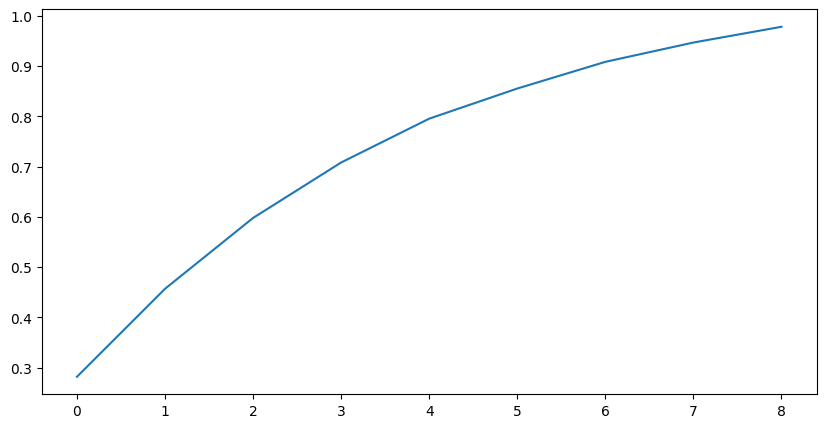

In [32]:
# Curva de aumento de la explicacion de la varianza al ir agregandole
# componentes. Sin .plot() nos da una tabla con los valores.

pd.Series(pca.explained_variance_ratio_.cumsum(),
          name='cumulative explained variance').plot(figsize=(10,5))